<a href="https://colab.research.google.com/github/MuhammadBilal848/Deep-Learning-Practice/blob/main/Data%20Augmentation%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import PIL
import cv2 as cv
import tensorflow as tf
from tensorflow import keras
import os
import pathlib
from sklearn.model_selection import train_test_split

In [3]:
dataset = 'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz'
data = keras.utils.get_file('flower_photos', origin=dataset,  cache_dir='/content/drive/MyDrive/Colab Notebooks', untar=True)
# cache_dir : when we set it to '.' the dataset is saved where the file is saved.
# untar = True , is used for unzipping.

In [4]:
data 

'/content/drive/MyDrive/Colab Notebooks/datasets/flower_photos'

In [5]:
data = pathlib.Path(data) # this converts the data path into windows path
data

PosixPath('/content/drive/MyDrive/Colab Notebooks/datasets/flower_photos')

In [6]:
images = list(data.glob('*/*.jpg')) # this returns the list of all the images available by going into directories n subdirectories.
img_count = len(list(data.glob('*/*.jpg'))) 

In [7]:
# What if we want to get only roses?  
# We can use .glob('roses/*')
roses = list(data.glob('roses/*'))

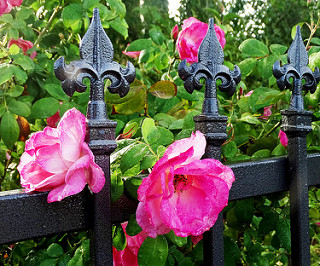

In [8]:
PIL.Image.open(roses[344])

In [9]:
flowers_dict = {
              'roses':list(data.glob('roses/*')),
              'daisy':list(data.glob('daisy/*')),
              'dandelion':list(data.glob('dandelion/*')),
              'sunflowers':list(data.glob('sunflowers/*')),
              'tulips':list(data.glob('tulips/*'))  
               }
flowers_name = {
              'roses':0,
              'daisy':1,
              'dandelion':2,
              'sunflowers':3,
              'tulips':4  
               }

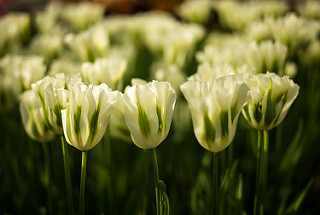

In [10]:
PIL.Image.open(flowers_dict['tulips'][0])

In [11]:
x , y = [] , []
for name,flower in flowers_dict.items():
  for flov in flower:
    img = cv.imread(str(flov))
    resize = cv.resize(img, (200,200))
    x.append(resize)
    y.append(flowers_name[name])

(<matplotlib.image.AxesImage at 0x7f8105e5c4c0>, 1)

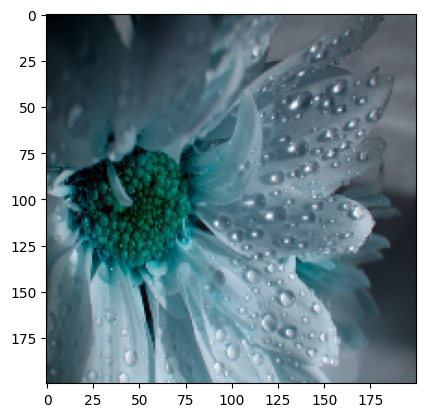

In [12]:
plt.imshow(x[1000]),y[1000]

In [13]:
x = np.array(x)
y = np.array(y)

In [14]:
xtrain , xtest , ytrain , ytest = train_test_split(x,y,test_size=0.2)

In [15]:
xtest.shape,ytest.shape

((734, 200, 200, 3), (734,))

In [16]:
xtrain = xtrain/255
xtest = xtest/255

In [17]:
model = keras.Sequential([
            keras.layers.Conv2D(16,(3,3),activation = 'relu'),
            keras.layers.MaxPool2D(),
            keras.layers.Conv2D(32,(3,3),activation = 'relu'),
            keras.layers.MaxPool2D(),
            keras.layers.Conv2D(64,(3,3),activation = 'relu'),
            keras.layers.MaxPool2D(),
            keras.layers.Flatten(),
            keras.layers.Dense(20,activation = 'relu'),
            keras.layers.Dense(5,activation = 'softmax') # 5 units bcz we have 5 classes of flower.
])

model.compile(optimizer = 'adam',loss=keras.losses.SparseCategoricalCrossentropy(),metrics = 'Accuracy')
model.fit(xtrain,ytrain,epochs = 10)

Epoch 1/10
92/92 [==============================] - 125s 1s/step - loss: 1.4985 - Accuracy: 0.3362
Epoch 2/10
92/92 [==============================] - 121s 1s/step - loss: 1.3498 - Accuracy: 0.4366
Epoch 3/10
92/92 [==============================] - 116s 1s/step - loss: 1.2264 - Accuracy: 0.5351
Epoch 4/10
92/92 [==============================] - 114s 1s/step - loss: 1.0526 - Accuracy: 0.6386
Epoch 5/10
92/92 [==============================] - 115s 1s/step - loss: 0.9075 - Accuracy: 0.6832
Epoch 6/10
92/92 [==============================] - 116s 1s/step - loss: 0.8008 - Accuracy: 0.7282
Epoch 7/10
92/92 [==============================] - 118s 1s/step - loss: 0.6850 - Accuracy: 0.7677
Epoch 8/10
92/92 [==============================] - 116s 1s/step - loss: 0.5940 - Accuracy: 0.7946
Epoch 9/10
92/92 [==============================] - 117s 1s/step - loss: 0.4551 - Accuracy: 0.8549
Epoch 10/10
92/92 [==============================] - 117s 1s/step - loss: 0.3660 - Accuracy: 0.8873


In [18]:
model.evaluate(xtest,ytest)
# Accuracy is very low due to overfitting

23/23 [==============================] - 10s 444ms/step - loss: 1.3127 - Accuracy: 0.6281


[1.3127374649047852, 0.6280654072761536]

In [19]:
zoom = keras.Sequential([
          keras.layers.experimental.preprocessing.RandomZoom(0.6) # randomly zoom on an image
])
# so consider dataug as a function that applies random zoom on the given image

(-0.5, 199.5, 199.5, -0.5)

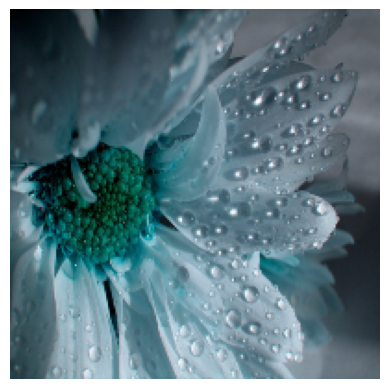

In [20]:
plt.imshow(x[1000])
plt.axis('off')

In [21]:
# lets try applying dataug on an image.
zoomimg = zoom(x).numpy().astype('uint8')

(-0.5, 199.5, 199.5, -0.5)

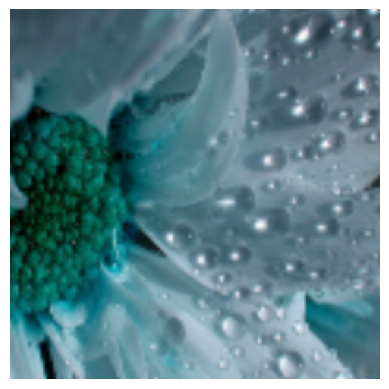

In [22]:
plt.imshow(zoomimg[1000])
plt.axis('off')